In [ ]:
from google.colab import drive
drive.mount('/content/drive')
###Montar contenido en Drive, no es necesario ejecutar esta celda para que el programa funcione##

# **Init**

In [ ]:
#Inicializar e instalar las librerías que se manejarán.
!pip install einsteinpy
import sympy
from sympy import simplify
from sympy.solvers import solve
from sympy import Function, symbols, sin, cos, pi
from einsteinpy.symbolic import MetricTensor, EinsteinTensor
import numpy as np
import warnings
import math
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pylab as mp

sympy.init_printing()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Definición de coordenadas y funciones involucradas en la métrica
syms = sympy.symbols('t r theta phi',real=True)
t, r, theta, phi = syms
a, m, h, alpha, p, L, O, Q, P, eps =symbols("a M h \\alpha \\rho^2 \\Lambda \\Omega Q P \\epsilon",real=True)

# Componentes de la métrica
metric = [[0 for i in range(4)] for i in range(4)]
metric[0][0] = (-Q+a**2*P*sin(theta)**2)*(1+h)/p
metric[1][1] = p*(1+h)/(Q+h*a**2*sin(theta)**2)
metric[2][2] = p/P
metric[3][3] = (P*(r**2+a**2)**2-Q*a**2*sin(theta)**2*(1+h))*sin(theta)**2/p+a**2*sin(theta)**2*(2*h+h*a**2*sin(theta)**2/p)
metric[0][3] = a*(P*(r**2+a**2)-Q)*(1+h)*sin(theta)**2/p
metric[3][0] = metric[0][3]

g = MetricTensor(metric, syms, name="non-kerr de Sitter accelerating metric")
g.tensor()

⎡            ⎛   2    2       ⎞                                               
⎢    (h + 1)⋅⎝P⋅a ⋅sin (θ) - Q⎠                                               
⎢    ──────────────────────────              0            0                   
⎢              \rho²                                                          
⎢                                                                             
⎢                                      \rho²⋅(h + 1)                          
⎢                 0                   ────────────────    0                   
⎢                                          2      2                           
⎢                                     Q + a ⋅h⋅sin (θ)                        
⎢                                                                             
⎢                                                       \rho²                 
⎢                 0                          0          ─────                 
⎢                                                   

In [ ]:
#Forma analítica del horizonte de eventos
hev=p**2*Q+a**2*sin(theta)**2*m**3*eps*r
hev0=hev.subs(Q,(a**2-2*m*r+r**2)*(1-alpha**2*r**2)+L/3*(a**2+r**2)*r**2).subs(p,r**2+a**2*cos(theta)**2)
hev0=sympy.expand(hev0)
hev0=sympy.simplify(hev0)
hev0

In [ ]:
#Inicializar la función de la ergosféra
erg=a**2*cos(theta)**2-2*m*r+r**2-(L/3)*((a**2+r**2)*r**2-a**4*(sin(theta)*cos(theta))**2)+alpha*(2*a**2*m*sin(theta)**2*cos(theta)-alpha*(r**2*(a**2-2*m*r)-a**4*(sin(theta)*cos(theta))**2))
erg

In [ ]:
#Función auxiliar que se usa mucho a lo largo del código
subs =lambda f,mass,spin,epsilon,alphas,Lambda: f.subs(m,mass).subs(a,spin).subs(eps,epsilon).subs(alpha,alphas).subs(L,Lambda)

In [ ]:
#inicializa la variable que guarda los radios del horizonte de eventos
rValues=[]

# **Estructura del agujero negro**

## **Horizonte de eventos**

In [ ]:
#Inicialización de las variables
mVal=1
aVal=0.5
alphaVal=0
epsilonVal=0.5
lambdaVal=0

In [ ]:
#Generar las distintas ecuaciones a resolver para cada punto en theta
numDeDatos=50 #número de soluciones que queremos calcular, a mayor número de datos más se demora el código
horizonEqs=[]
string=f"$M=${mVal}, $\\alpha=${alphaVal}, $a=${aVal}, $\\epsilon=${epsilonVal}, $\\Lambda =${lambdaVal}"
hev1=subs(hev0,mVal,aVal,epsilonVal,alphaVal,lambdaVal)
thetaValues=np.linspace(0,1,numDeDatos)*math.pi/2
for j in thetaValues:
  horizonEqs.append(hev1.subs(theta,j))

In [ ]:
rValues=[]
thetaValues0=[]
for i in range(len(horizonEqs)):
  #Método que devuelve las soluciones para cada ecuación dependiendo de theta
  sol=list(filter(lambda l:type(l)==sympy.core.numbers.Float, solve(horizonEqs[i],r,check=False))) 
  if len(sol)!=0:
    #Dado que el horizonte de eventos corresponde a la zona exterior de las soluciones se toma la solución real que sea mayor
    rValues.append(max(sol))
    thetaValues0=np.append(thetaValues0,thetaValues[i])
  
thetaValues=thetaValues0

## **Gráficar Horizonte de eventos**

In [ ]:
#Dado que la métrica muestra simetría en phi, se ploteará la figura para 20 puntos en phi
phiValues=np.linspace(0,1,20)*math.pi/2
x,y,z=np.array([]),np.array([]),np.array([])
numb=1
for t in range(len(thetaValues[0:-8])):
  for i in range(len(phiValues)):
    #Se transforman las coordenadas en coordenadas esféricas
    y=np.append(y,rValues[t]*np.sin(thetaValues[t])*np.sin(phiValues[numb*i]))
    x=np.append(x,rValues[t]*np.sin(thetaValues[t])*np.cos(phiValues[numb*i]))
    z=np.append(z,rValues[t]*np.cos(thetaValues[t]))
    numb*=-1
#Las coordenadas cooresponden a un octante del horizonte de eventos debido a la simetría en el plano x-y y en phi.
x,y,z=np.array([x]),np.array([y]),np.array([z])

In [ ]:
from matplotlib import cm
#Se inicia el entorno 3D de matplotlib
fig = mp.figure()
ax1 = fig.add_subplot(111,projection='3d')
fig.set_figheight(10)
fig.set_figwidth(10)

#Se grafican los 8 octantes para formar la totalidad del horizonte
mp.title(string)

ax1.plot_wireframe(x, y, z)
ax1.plot_wireframe(-x, -y, -z)
ax1.plot_wireframe(-x, -y, z)
ax1.plot_wireframe(-x, y, -z)
ax1.plot_wireframe(x, -y, -z)
ax1.plot_wireframe(-x, y, z)
ax1.plot_wireframe(x, -y, z)
ax1.plot_wireframe(x, y, -z)

ax1.view_init(0)

ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_zlabel('$z$')

ax1.legend()
mp.show()

## Horizonte de eventos respecto de cada parámetro

In [ ]:
#Se iniciaizan nuevas variables para ejecutar
mVal1=1
aVal1=0.5
epsilonVal1=0
lambdaVal1=[0]

In [ ]:
#Se construye el vector de funciones a resolver
horizonEqs1=[]
alphaVal1=np.linspace(-1,1,100)
counter=0
for i in lambdaVal1:
  horizonEqs1.append([])
  hev2=hev0.subs(m,mVal1).subs(a,aVal1).subs(eps,epsilonVal1).subs(L,lambdaVal[i]).subs(theta,pi/2)
  for j in alphaVal:
    horizonEqs1[counter].append(hev2.subs(alpha,j))
  counter+=1

In [ ]:
#Se encuentra el valor del horizonte de eventos para cada valor del parámetro que se quiere variar
rValues1=[]
parameter1=[]
for j in range(len(lambdaVal1)):
  rValues1.append([])
  parameter1.append([])
  for i in range(len(horizonEqs1[0])):
    sol=list(filter(lambda l:type(l)==sympy.core.numbers.Float, solve(horizonEqs[j][i],r,check=False)))
    if len(sol)!=0:
      rValues1[j].append(max(sol))
      parameter1[j].append(alphaVal1[i])

### Graficar horizontes respecto de variables

No handles with labels found to put in legend.


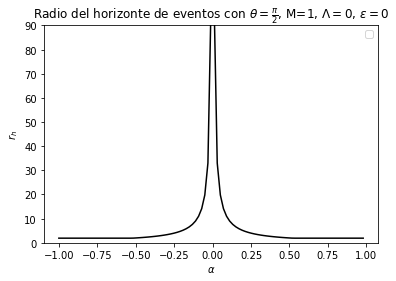

In [ ]:
#Se grafican los resultados
mp.plot(np.array(parameter1[0][0:50]),rValues1[0][0:50],"k-")
mp.plot(np.array(parameter1[0][50:-1]),rValues1[0][50:-1],"k-")

mp.xlabel("$\\alpha$")
mp.ylabel("$r_h$")
mp.ylim(0,90)
string1="Radio del horizonte de eventos con $\\theta=\\frac{\\pi}{2}$, M=1, $\\Lambda=0$, $\\epsilon=0$"
mp.title(string1)
mp.legend()
mp.show()

## Ergósfera

In [ ]:
#Se evalúa la ergósfera en los valores definidos antes para cada parámetro
erg1=subs(erg,mVal,aVal,epsilonVal,alphaVal,lambdaVal)
erg1=erg1.expand()
#Número de ángulos donde se va a evaluar la ergósfera
numDeDatosErgosfera=50
thetas=np.linspace(0,1,numDeDatosErgosfera)*math.pi
ergoEqs=[]
#Diferentes ecuaciones para la ergosfera dado theta
for i in thetas:
  ergoEqs.append(erg1.subs(theta,i))

In [ ]:
#Encuentra las soluciones para la ergósfera
ergoRads=[]
thetas0=[]
sol1=lambda x:sympy.re(x)
for i in range(len(ergoEqs)):
  numbs=solve(ergoEqs[i],r,check=False)
  sol=list(filter(lambda l:sympy.im(l)<1e-20, numbs))
  for j in range(len(sol)):
    sol[j]=sol1(sol[j])
  if len(sol)!=0:
    ergoRads.append(max(sol))
    thetas0=np.append(thetas0,thetas[i])

In [ ]:
#Si el horizonte de eventos ya se calculó plotea el horizonte de eventos junto con la ergósfera
if len(rValues)!=0:
  xh=np.array(rValues)*np.sin(np.array(thetaValues))
  yh=np.array(rValues)*np.cos(np.array(thetaValues))
else:
  xh=[]
  yh=[]

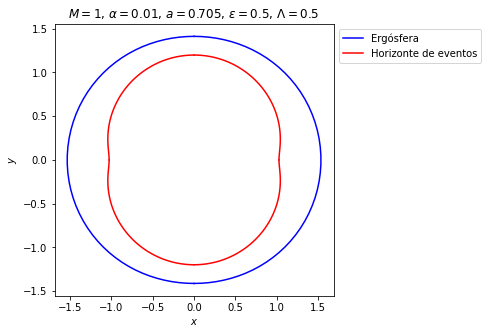

In [ ]:
#Plotear ergosfera y eventos si es posible
x=np.array(ergoRads)*np.sin(np.array(thetas))
y=np.array(ergoRads)*np.cos(np.array(thetas))
mp.figure(figsize=(5,5))
mp.plot(x,y,"b-",label="Ergósfera")
mp.plot(-x,y,"b-")
if len(xh)!=0:
  mp.plot(xh,yh,"r-",label="Horizonte de eventos")
  mp.plot(xh,-yh,"r-")
  mp.plot(-xh,-yh,"r-")
  mp.plot(-xh,yh,"r-")
mp.title(string)
mp.legend(bbox_to_anchor=(1.0, 1))
mp.xlabel("$x$")
mp.ylabel("$y$")
mp.show()

# **Termodinámica del agujero negro**

## **Area del Horizonte de eventos**

Longitud de la curva= 15.707306016530719 \\ Area del horizonte de eventos= 8011.04430902847 masa 1


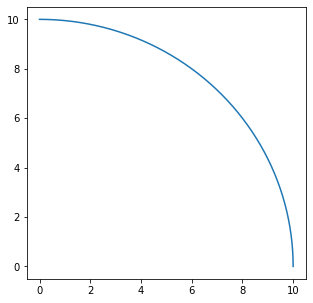

In [ ]:
#Con el cálculo del horizonte de eventos se puede calcular el area de este, para luego calcular la entropía 
xa=rValues*np.sin(thetaValues)
ya=rValues*np.cos(thetaValues)
longitud=0
area=0
for i in range(len(xa)-1):
  #Se calcula el area del horizonte de eventos aproximando dos anillos de la solución a un cono truncado y sumando sus areas superficiales
  longitud+=math.sqrt((ya[i]-ya[i+1])**2+(xa[i]-xa[i+1])**2)
  r2=xa[i]
  r1=xa[i+1]
  h=ya[i]-ya[i+1]
  area+=np.pi*(r2**2+r1**2+math.sqrt(h**2+(r1-r2)**2)*(r1+r2))
area*=1/2
print("Longitud de la curva=",longitud,"\\\\ Area del horizonte de eventos=",area,"masa",mVal)
mp.figure(figsize=(5, 5))
mp.plot(xa,ya)
mp.show()

In [ ]:
#Guarda los resultados en un .txt alojado en el drive del autor
rad=open("/content/drive/My Drive/Universidad/Semestre 9/DatosIntTeo/EntropiaFisica3.txt","a")
rad.write(string+"\n")
rad.write("Area = "+str(area)+"\n")
rad.write("Longitud = "+str(longitud)+"\n")
for i in range(len(rValues)):
  rad.write(str(rValues[i])+"\t"+str(thetaValues[i])+"\n")
rad.write("--------------------------------------------------"+"\n")
rad.close()
###No es necesario ejecutar esta celda##

## **Gravedad Superficial**

In [ ]:
#Se definen los intervalos de interes para la gravedad superficial respecto de la masa del agujeero negro
mases=np.linspace(1,200)
#mases=np.append(mases,np.linspace(41,43,10))
#mases=np.append(mases,np.linspace(44,60,10))

In [ ]:
#Se varía para dos valores distintos de epsilon en este caso, pero este mismo método se puede usar para los demás parámetros, salvo la masa.
#epsilons=np.array([-10,10])*epsilonVal
epsilons=[0.5]
rHorizon=[]
#una vez se tienen los parámetros definidos, se calcula el radio del horizonte de eventos en pi/2 para cada valor de masa y parámetro.
for j in range(len(epsilons)):
  rHorizon.append([])
  for i in range(len(mases)):
    eventHorizon=subs(hev0,mases[i],aVal,epsilonVal,alphaVal,lambdaVal).subs(theta,pi/2)
    rHorizon[j].append(max(list(filter(lambda x:type(x)!=sympy.core.add.Add,solve(eventHorizon,r,check=False)))))

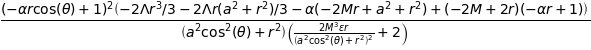

In [ ]:
#Se define la gravedad superficial 
kappa=(O**2/(2*(1+h)*p))*sympy.diff((a**2-2*m*r+r**2)*(1-alpha*r)-(L/3)*(a**2+r**2)*r**2,r)
kappa=kappa.subs(O,1-alpha*r*cos(theta)).subs(h,eps*m**3*r/p**2).subs(p,r**2+a**2*cos(theta)**2)
kappa

In [ ]:
gSup=[]
#Se calcula cada valor para la gravedad superficial
for j in range(len(epsilons)):
  gSup.append([])
  for i in range(len(mases)):
    gAux=kappa.subs(m,mases[i]).subs(a,aVal).subs(alpha,alphaVal).subs(eps,epsilons[j]).subs(L,lambdaVal).subs(theta,pi/2)
    gSup[j].append(gAux.subs(r,rHorizon[j][i]))
gSup

In [ ]:
#Finalmente se plotea el resultado final
mp.plot([0,200],[0,0],"k--")
sup=23
mp.plot(mases[0:sup],(np.array(gSup[0])/(2*pi))[0:sup],"r-",label=f"$\\epsilon = ${epsilons[0]}")
mp.plot(mases[sup+1:-1],(np.array(gSup[0])/(2*pi))[sup+1:-1],"r-")
mp.plot(mases,np.array(gSup[1])/(2*pi),label=f"$\\epsilon = ${epsilons[1]}")
mp.title(f"$\\Lambda=${lambdaVal}, $a=${aVal}, $\\alpha=${alphaVal}")
mp.xlabel("$M$")
mp.ylabel("$T$")
mp.legend()
mp.show()

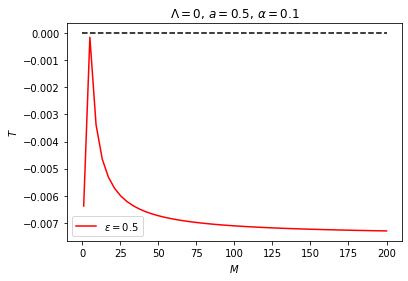

In [ ]:
#Finalmente se plotea el resultado final
mp.plot([0,200],[0,0],"k--")
#sup=23
mp.plot(mases,(np.array(gSup[0])/(2*pi)),"r-",label=f"$\\epsilon = ${epsilons[0]}")
mp.title(f"$\\Lambda=${lambdaVal}, $a=${aVal}, $\\alpha=${alphaVal}")
mp.xlabel("$M$")
mp.ylabel("$T$")
mp.legend()
mp.show()

# Horizontes en $\frac{\pi}{2}$ respecto de cosas

##Init

In [ ]:
def comparate(x):
  if not x.is_real:
    if abs(sympy.im(x)/sympy.re(x))<1e-3:
      x=np.sqrt(sympy.re(x)**2+sympy.im(x)**2)
    else:
      x=np.nan
  return x
def comparateBool(x):
  if not x.is_real:
    if abs(sympy.im(x)/sympy.re(x))<1e-3:
      return True
    else:
      return False
  elif x>0:
    return True
  return False
def subs(*vals):
  f=vals[0]
  if len(vals)!=1:
    for i in range(1,len(vals),2):
      f=f.subs(vals[i],vals[i+1])
  return f
def resultados(parametro,parametros,aes,size,*args,title="",scatter=True,grade=8):
  sols=[]
  soluciones=[[] for i in range(grade)]
  for k in range(len(parametros)):
    sols.append([])
    for val in aes:
      sols[k].append(sympy.solve(subs(*args).subs(parametro,parametros[k]).subs(a,val)))
    count=0
    for sol in soluciones:
      sol.append([])
      for i in range(len(sols[k])):
        #print(sols[k][i][count])
        if count<len(sols[k][i]):
          sol[k].append(comparate(sols[k][i][count])) 
        else:
          sol[k].append(np.nan)
      count+=1
  aesKerr=np.linsympyace(0,1,100)
  r1,r2=1+np.sqrt(1-aesKerr**2),1-np.sqrt(1-aesKerr**2)
  mp.figure(figsize=size)
  mp.title(title)
  mp.grid(visible=True, ls="--")
  mp.plot(aesKerr,r1,"k-",label="Kerr")
  mp.plot(aesKerr,r2,"k-")
  colors=["r--","g--","b--","c--","m--","y--"]
  if scatter:
    for k in range(len(parametros)):
      mp.scatter(aes,soluciones[0][k],c=colors[k][0],s=2,label="$"+str(parametro)+"=$"+str(parametros[k]))
      for i in range(1,grade):
        mp.scatter(aes,soluciones[i][k],c=colors[k][0],s=2)
  else:
    for k in range(len(parametros)):
      mp.plot(aes,soluciones[0][k],colors[k],label="$"+str(parametro)+"=$"+str(parametros[k]))
      for i in range(1,grade):
        mp.plot(aes,soluciones[i][k],colors[k])
  mp.xlabel("$a$")
  mp.ylabel("$\\frac{r}{M}$")
  mp.ylim(0)
  mp.legend(bbox_to_anchor=(1.4,1))

##Soluciones respecto de Kerr


In [ ]:
aes=np.linspace(0,5)
Lambdas=[-0.3,-0.15, -0.1, 0, 0.1, 0.15]
epsilons=[-5, -0.5, 0, 0.5, 5]
Lambdas0=[-2,-1, -0.1, 0.1, 0.15]
alphas=[0,0.5,0.9,1]
epsilons0=[-1, -0.5,-0.25, 0.25, 0.5, 1]
hev0.subs(theta,pi/4)

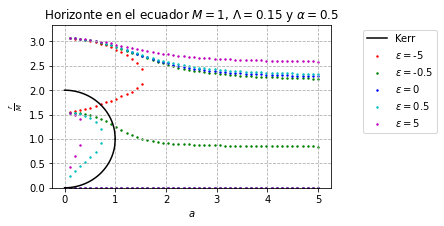

In [ ]:
resultados(eps,epsilons,aes,(5,3),hev0, m, 1, L, 0.15, alpha, 0.5,theta, pi/2, title="Horizonte en el ecuador $M=1$, $\\Lambda=0.15$ y $\\alpha=0.5$")

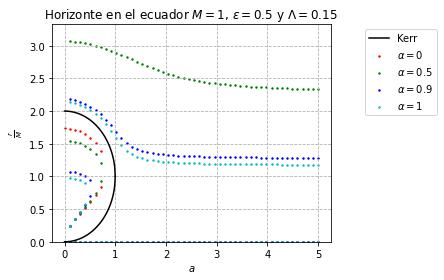

In [ ]:
resultados(alpha,alphas,aes,(5,4),hev0, m, 1, L, 0.15, eps, 0.5,theta, pi/2, title="Horizonte en el ecuador $M=1$, $\\epsilon=0.5$ y $\\Lambda=0.15$")

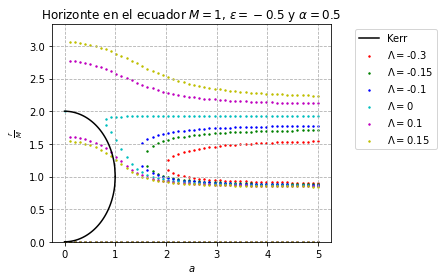

In [ ]:
resultados(L,Lambdas,aes,(5,4),hev0, m, 1, eps, -0.5, alpha, 0.5,theta, pi/2, title="Horizonte en el ecuador $M=1$, $\\epsilon=-0.5$ y $\\alpha=0.5$")

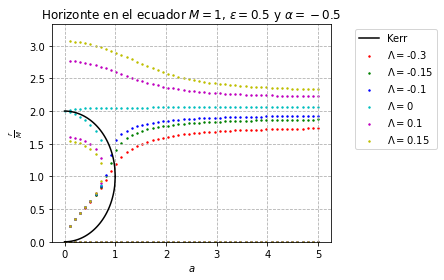

In [ ]:
resultados(L,Lambdas,aes,(5,4),hev0, m, 1, eps, 0.5, alpha, -0.5,theta, pi/2, title="Horizonte en el ecuador $M=1$, $\\epsilon=0.5$ y $\\alpha=-0.5$")

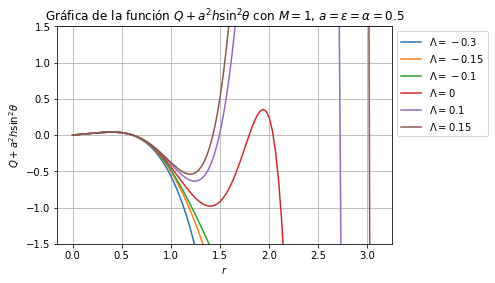

In [ ]:
rval0=np.linspace(0,3.1,100)
graf0=[[subs(hev0,theta,pi/2,m,1,eps,0.5,alpha,0.5,a,0.5,L,i,r,rval) for rval in rval0] for i in Lambdas]
count=0
for i in graf0:
  mp.plot(rval0,i,label=f"$\\Lambda={Lambdas[count]}$")
  count+=1
mp.grid()
mp.title("Gráfica de la función $Q+a^2h\\sin^2\\theta$ con $M=1$, $a=\\epsilon=\\alpha=0.5$")
mp.ylim(-1.5,1.5)
mp.xlabel("$r$")
mp.ylabel("$Q+a^2h\\sin^2\\theta$")
mp.legend(bbox_to_anchor=(1,1))

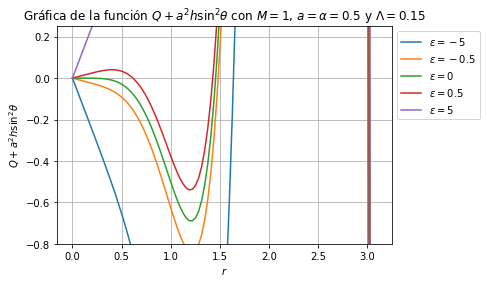

In [ ]:
rval1=np.linspace(0,3.1,100)
graf1=[[subs(hev0,theta,pi/2,m,1,eps,i,alpha,0.5,a,0.5,L,0.15,r,rval) for rval in rval1] for i in epsilons]
count=0
for i in graf1:
  mp.plot(rval1,i,label=f"$\\epsilon={epsilons[count]}$")
  count+=1
mp.title("Gráfica de la función $Q+a^2h\\sin^2\\theta$ con $M=1$, $a=\\alpha=0.5$ y $\\Lambda=0.15$ ")
mp.grid()
mp.ylim(-0.8,1/4)
mp.xlabel("$r$")
mp.ylabel("$Q+a^2h\\sin^2\\theta$")
mp.legend(bbox_to_anchor=(1,1))

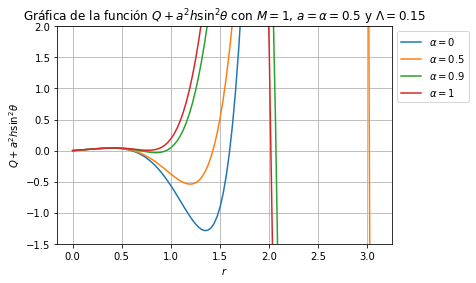

In [ ]:
rval2=np.linspace(0,3.1,100)
graf2=[[subs(hev0,theta,pi/2,m,1,eps,0.5,alpha,i,a,0.5,L,0.15,r,rval) for rval in rval2] for i in alphas]
count=0
for i in graf2:
  mp.plot(rval2,i,label=f"$\\alpha={alphas[count]}$")
  count+=1
mp.title("Gráfica de la función $Q+a^2h\\sin^2\\theta$ con $M=1$, $a=\\epsilon=0.5$ y $\\Lambda=0.15$ ")
mp.grid()
#mp.xlim(0,1)
mp.ylim(-1.5,2)
mp.xlabel("$r$")
mp.ylabel("$Q+a^2h\\sin^2\\theta$")
mp.legend(bbox_to_anchor=(1,1))

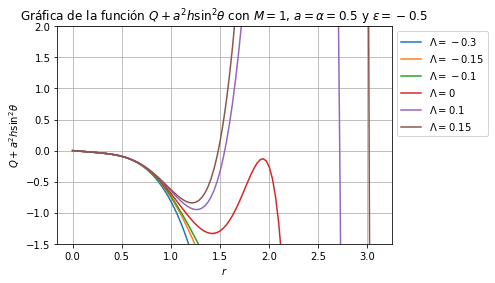

In [ ]:
rval3=np.linspace(0,3.1,100)
graf3=[[subs(hev0,theta,pi/2,m,1,eps,-0.5,alpha,0.5,a,0.5,L,i,r,rval) for rval in rval3] for i in Lambdas]
count=0
for i in graf3:
  mp.plot(rval3,i,label=f"$\\Lambda={Lambdas[count]}$")
  count+=1
mp.title("Gráfica de la función $Q+a^2h\\sin^2\\theta$ con $M=1$, $a=\\alpha=0.5$ y $\\epsilon=-0.5$ ")
mp.grid()
#mp.xlim(0,1)
mp.ylim(-1.5,2)
mp.xlabel("$r$")
mp.ylabel("$Q+a^2h\\sin^2\\theta$")
mp.legend(bbox_to_anchor=(1,1))

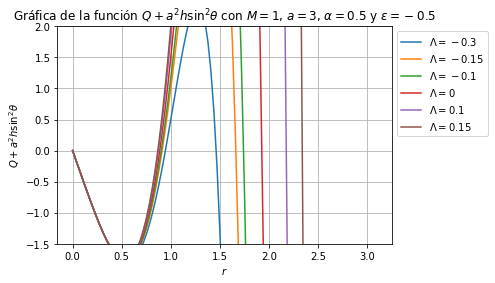

In [ ]:
rval4=np.linspace(0,3.1,100)
graf4=[[subs(hev0,theta,pi/2,m,1,eps,-0.5,alpha,0.5,a,3,L,i,r,rval) for rval in rval4] for i in Lambdas]
count=0
for i in graf4:
  mp.plot(rval4,i,label=f"$\\Lambda={Lambdas[count]}$")
  count+=1
mp.title("Gráfica de la función $Q+a^2h\\sin^2\\theta$ con $M=1$, $a=3$, $\\alpha=0.5$ y $\\epsilon=-0.5$ ")
mp.grid()
#mp.xlim(0,1)
mp.ylim(-1.5,2)
mp.xlabel("$r$")
mp.ylabel("$Q+a^2h\\sin^2\\theta$")
mp.legend(bbox_to_anchor=(1,1))